**Цели**
- Kmeans
- DBScan
- AgglomerativeClustering
- дропнуть целевую
- найти для kmean кол-во кластеров
- найти опт параметры для dbscan 
- просмотреть что внутри


In [72]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from node2vec import Node2Vec
import networkx as nx
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from sklearn.neighbors import kneighbors_graph
from kneed import KneeLocator
import multiprocessing

In [73]:
df=pd.read_csv('.\\data_tms.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df['Sex']=df['Sex'].map({'female':0,'male':1})
df['SibSp+Parch']=df['SibSp']+df['Parch']
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)
df_x=df.drop(columns=['Survived','Name','Ticket','Ticket','Cabin','PassengerId'],axis=1)
df_x=df_x.dropna()
print(df_x.shape)
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_x)


(714, 9)


In [ ]:
K_range = range(1, 10)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

kl = KneeLocator(
    x=list(K_range),
    y=inertias,
    curve="convex",
    direction="decreasing"
)

optimal_k = kl.elbow
print(f"Оптимальное количество кластеров: {optimal_k}")

c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

Оптимальное количество кластеров: 4


c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

In [76]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(df_scaled)
labels_kmeans=kmeans.fit_predict(df_scaled)
score_kmean=silhouette_score(df_scaled,labels_kmeans)
df_x['Cluster_kmeans']=labels_kmeans

print(f"score : {score_kmean}")
print(df_x.groupby('Cluster_kmeans').mean())
print(labels_kmeans)

c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


score : 0.2978057774526976
                  Pclass       Sex        Age     SibSp     Parch       Fare  \
Cluster_kmeans                                                                 
0               2.785714  0.571429  28.089286  0.750000  0.392857  18.265775   
1               2.682990  0.760309  29.090000  0.206186  0.085052  12.718459   
2               1.072222  0.550000  39.383333  0.383333  0.255556  76.629468   
3               2.415254  0.364407  17.311441  1.661017  1.847458  46.884532   

                SibSp+Parch  Embarked_Q  Embarked_S  
Cluster_kmeans                                       
0                  1.142857         1.0    0.000000  
1                  0.291237         0.0    0.909794  
2                  0.638889         0.0    0.533333  
3                  3.508475         0.0    0.889831  
[1 2 1 2 1 2 3 3 2 3 2 1 3 1 1 0 1 1 1 0 2 3 3 3 2 1 2 2 1 3 1 1 1 3 0 1 3
 1 2 1 2 1 1 3 3 1 2 2 3 1 1 3 1 1 3 1 1 1 1 3 1 1 1 2 1 3 3 3 1 1 1 2 3 1
 2 2 1 1 1 2 1 1 1

c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


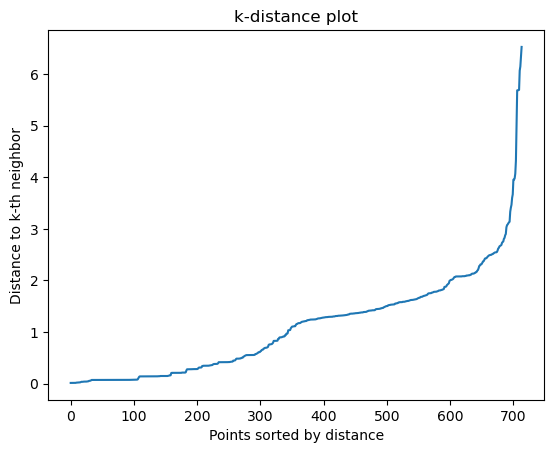

In [77]:
k = 10 
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances[:, k - 1], axis=0)

plt.plot(distances)
plt.title('k-distance plot')
plt.ylabel('Distance to k-th neighbor')
plt.xlabel('Points sorted by distance')
plt.show()

In [78]:
dbscan=DBSCAN(eps=2.3,min_samples=10)
labels_dbs=dbscan.fit_predict(df_scaled)
df_x['Cluster_dbs']=labels_dbs
print(df_x.groupby('Cluster_dbs').mean())
score_dbs=silhouette_score(df_scaled,labels_dbs)
print(f"score : {score_dbs}")

               Pclass       Sex        Age     SibSp     Parch        Fare  \
Cluster_dbs                                                                  
-1           2.000000  0.500000  29.247143  1.392857  2.535714  160.146875   
 0           2.330869  0.670980  29.330555  0.504621  0.356747   25.436066   
 1           1.772358  0.528455  31.186341  0.414634  0.341463   50.821481   
 2           2.818182  0.500000  31.022727  0.136364  0.090909   12.537123   

             SibSp+Parch  Embarked_Q  Embarked_S  Cluster_kmeans  
Cluster_dbs                                                       
-1              3.928571    0.214286    0.464286        2.142857  
 0              0.861368    0.000000    1.000000        1.517560  
 1              0.756098    0.000000    0.000000        1.796748  
 2              0.227273    1.000000    0.000000        0.000000  
score : 0.2621996110413257


In [79]:
tree=AgglomerativeClustering(n_clusters=4,linkage='complete', metric='manhattan')
labels_tree=tree.fit_predict(df_scaled)
df_x['Cluster_tree']=labels_tree
score_tree=silhouette_score(df_scaled,labels_tree)
print(f"score : {score_tree}")
print(df_x.groupby('Cluster_tree').mean())

score : 0.47782730892679764
                Pclass       Sex        Age     SibSp     Parch        Fare  \
Cluster_tree                                                                  
0             2.688889  0.422222  18.533333  2.888889  2.422222   63.227778   
1             2.186520  0.652038  30.530831  0.336991  0.293103   31.157059   
2             2.785714  0.571429  28.089286  0.750000  0.392857   18.265775   
3             1.000000  0.666667  35.333333  0.000000  0.333333  512.329200   

              SibSp+Parch  Embarked_Q  Embarked_S  Cluster_kmeans  Cluster_dbs  
Cluster_tree                                                                    
0                5.311111         0.0    0.955556         3.00000    -0.311111  
1                0.630094         0.0    0.800940         1.50627     0.184953  
2                1.142857         1.0    0.000000         0.00000     1.357143  
3                0.333333         0.0    0.000000         2.00000    -1.000000  


In [80]:
print(f"workers : {multiprocessing.cpu_count()}")

workers : 8


In [81]:
adjacency = kneighbors_graph(df_scaled, n_neighbors=5, mode='connectivity', include_self=False)
G = nx.from_scipy_sparse_array(adjacency)
model_n2v_kmeans = Node2Vec(G, dimensions=2, walk_length=30, num_walks=40, workers=8,p=0.25,q=0.25)
model_kmeans = model_n2v_kmeans.fit(window=10, min_count=5, batch_words=100)

embeddings_n2v_kmeans = model_kmeans.wv.vectors

kmeans = KMeans(n_clusters=4, random_state=42)
labels_n2v = kmeans.fit_predict(embeddings_n2v_kmeans)

score_n2v = silhouette_score(embeddings_n2v_kmeans, labels_n2v)
print(f'Silhouette Score: {score_n2v}')

Computing transition probabilities:   0%|          | 0/714 [00:00<?, ?it/s]

Silhouette Score: 0.7182735800743103


c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kiril\anaconda3\envs\MLops_main\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [82]:
model_n2v_dbs = Node2Vec(G, dimensions=9, walk_length=30, num_walks=40, workers=8,p=0.25,q=1)
model_dbs = model_n2v_dbs.fit(window=10, min_count=5, batch_words=4)

embeddings_n2v_dbs = model_dbs.wv.vectors

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbs = dbscan.fit_predict(embeddings_n2v_kmeans)

score_dbs = silhouette_score(embeddings_n2v_dbs, labels_dbs)
print(f'Silhouette Score: {score_dbs}')

Computing transition probabilities:   0%|          | 0/714 [00:00<?, ?it/s]

Silhouette Score: 0.0016042094212025404


In [83]:

model_n2v_tree = Node2Vec(G, dimensions=9, walk_length=30, num_walks=40, workers=8,p=0.25,q=1)
model_tree = model_n2v_tree.fit(window=10, min_count=5, batch_words=4)

embeddings_n2v_tree = model_tree.wv.vectors

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean')
labels_agg = agg_clustering.fit_predict(embeddings_n2v_tree)

score_agg = silhouette_score(embeddings_n2v_tree, labels_agg)
print(f'Silhouette Score: {score_agg}')

Computing transition probabilities:   0%|          | 0/714 [00:00<?, ?it/s]

Silhouette Score: 0.1410849392414093


| Метод кластеризации | Silhouette Score | 
|----------------------|------------------|
|  KMeans               |  0.2978057774526976               |
|DBSCAN                 |          0.2621996110413257       |
|AgglomerativeClustering|      0.47782730892679764           |                                
|KMeans + node2vec                    |     0.18441028892993927           |                          
|DBSCAN + node2vec                   |        -0.21087706089019775         |                          
|AgglomerativeClustering + node2vec               |    0.15145334601402283            |                          
                          




- **AgglomerativeClustering (на признаках)** — **лучший** (0.478).
- **KMeans** — **второй** (0.298).
- **DBSCAN** — **худший** (0.262 и -0.211).
- **node2Vec** **ухудшил** Silhouette Score для всех методов.
- **AgglomerativeClustering** — **лучший алгоритм**.
- **node2Vec** — **не помог** на этих данных.             